In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
cols = ["fLength","fWidth","fSize","fConc","fCon1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","Class"]
df = pd.read_csv('magic04.data',names=cols)
df.head()

--2025-11-21 17:34:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘magic04.data’

magic04.data            [ <=>                ]   1.41M  --.-KB/s    in 0.1s    

2025-11-21 17:34:54 (11.3 MB/s) - ‘magic04.data’ saved [1477391]



,fLength,fWidth,fSize,fConc,fCon1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df['Class'] = (df['Class'] == "g").astype(int)

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fCon1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [5]:
df['Class'].unique()

array([1, 0])

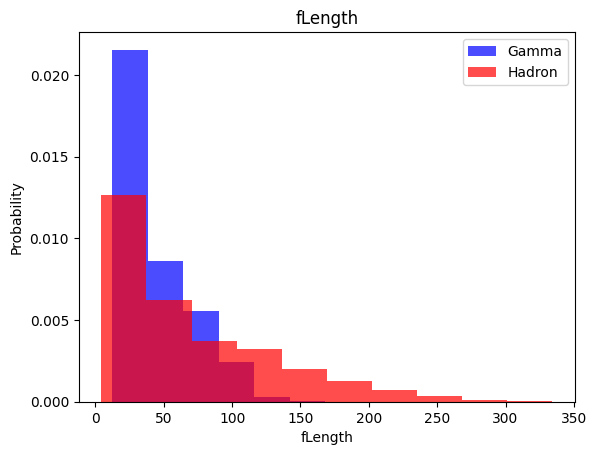

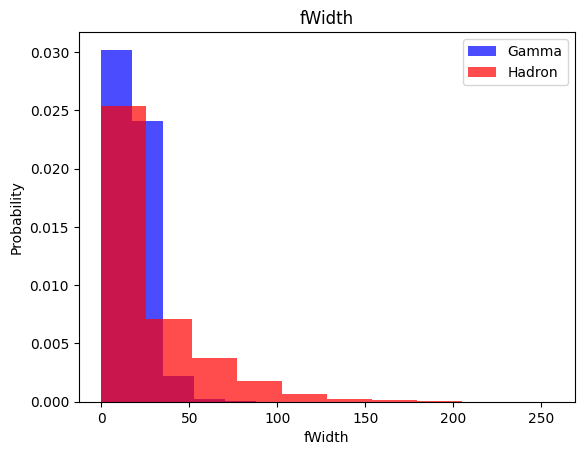

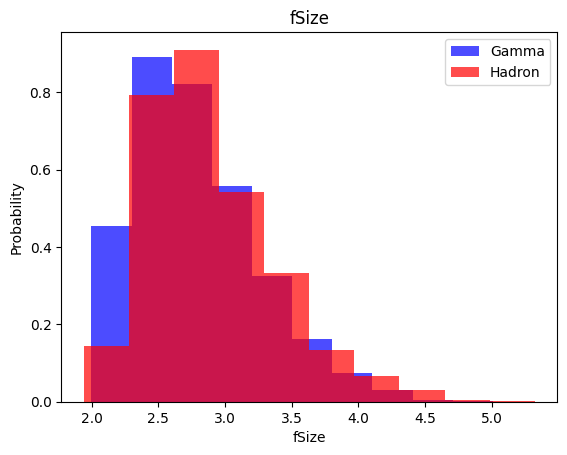

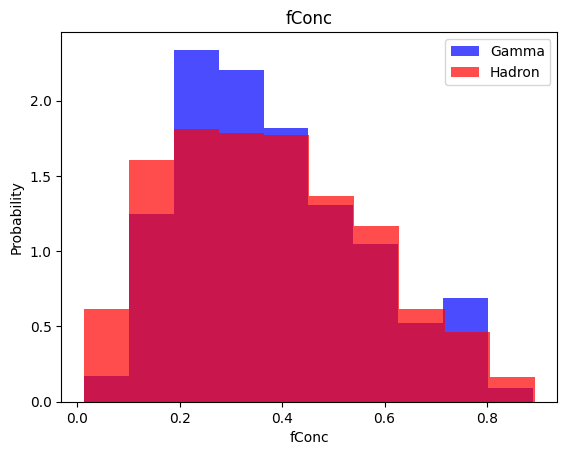

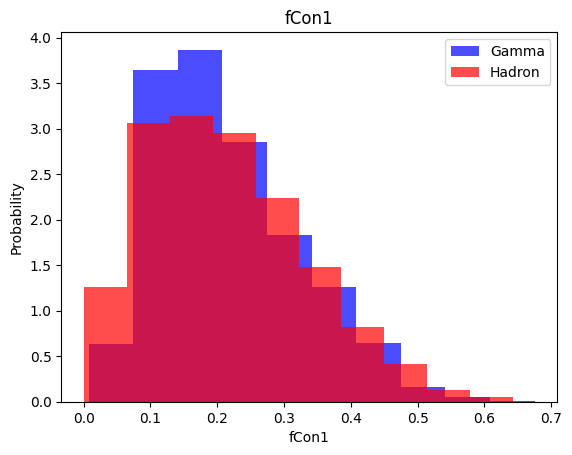

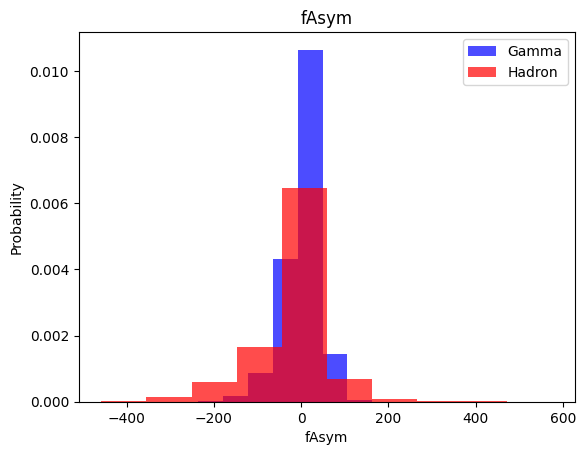

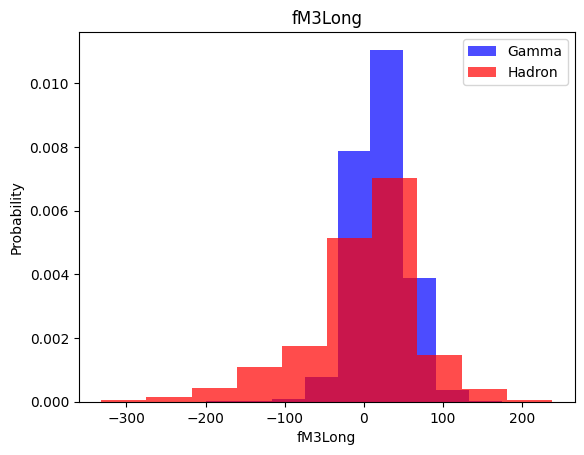

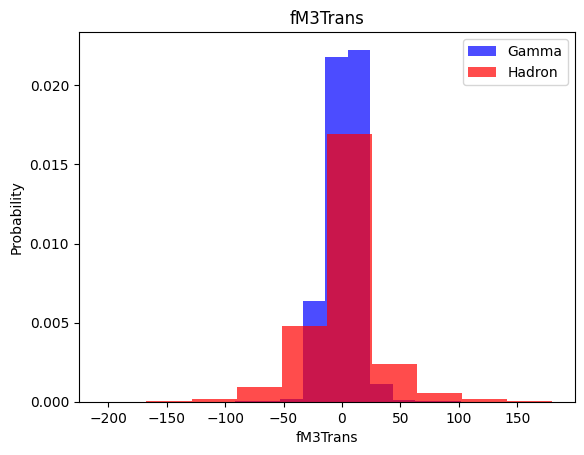

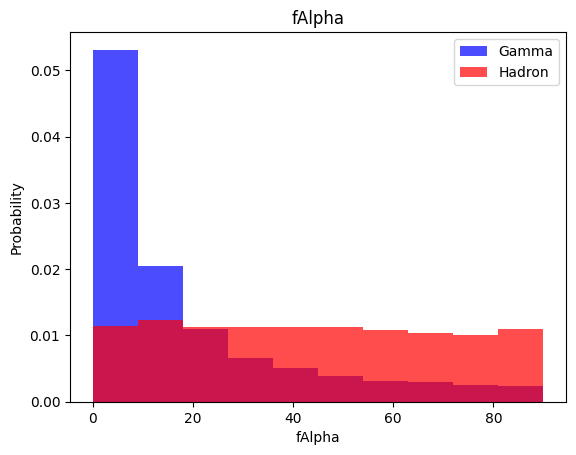

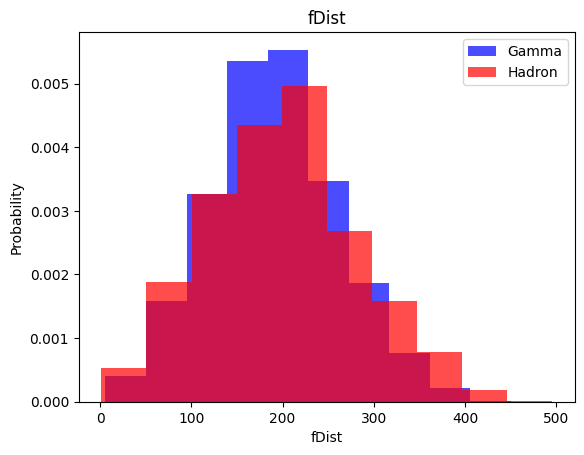

In [6]:
 for label in cols[:-1]:
  plt.hist(df[df["Class"]== 1] [label], color='blue',label='Gamma',alpha=0.7,density = True)
  plt.hist(df[df["Class"]== 0] [label], color='red',label='Hadron',alpha=0.7,density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
train ,valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
def scale_dataset(dataframe,over_sample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if over_sample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)
  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data ,x,y

In [9]:
train , x_train, y_train = scale_dataset(train,over_sample=True)
vaild , x_vaild, y_valid = scale_dataset(valid,over_sample=False)
test,x_test,y_test = scale_dataset(test,over_sample=False)

#KNN
(K-nearest neighbour)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
y_pred = knn_model.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1326
           1       0.89      0.81      0.85      2478

    accuracy                           0.81      3804
   macro avg       0.80      0.82      0.80      3804
weighted avg       0.83      0.81      0.82      3804

